#PRML Course Project
Topic: Stroke Prediction  
Name: Palak Singh, Sakshi Todi  
Roll no: B20EE086, B20EE088

###Importing libraries

In [2]:
# For ML models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Miscellaneous
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns

##Pre processing


In [3]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##Descriptive data analysis

In [5]:
# Drop the id column
data.drop(columns=['id'], inplace=True)

In [6]:
#bmi has null values which are being replaced by meanvalues of the data
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [7]:
#continous data
data.describe()[1:][['age','avg_glucose_level','bmi']]

,age,avg_glucose_level,bmi
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [8]:
#normalizing the numerical attributes
# Create a new column for normalized age
data['age_norm']=(data['age']-data['age'].min())/(data['age'].max()-data['age'].min())

# Create a new column for normalized avg glucose level
data['avg_glucose_level_norm']=(data['avg_glucose_level']-data['avg_glucose_level'].min())/(data['avg_glucose_level'].max()-data['avg_glucose_level'].min())

# Create a new column for normalized bmi
data['bmi_norm']=(data['bmi']-data['bmi'].min())/(data['bmi'].max()-data['bmi'].min())

In [9]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.743652,0.679023,0.212981
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.975586,0.234512,0.254296
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.597168,0.536008,0.276060
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.963379,0.549349,0.156930


In [10]:
# Discretize with respective equal-width bin
data['age_binned'] = pd.cut(data['age'], np.arange(0, 91, 5))
data['avg_glucose_level_binned'] = pd.cut(data['avg_glucose_level'], np.arange(0, 301, 10))
data['bmi_binned'] = pd.cut(data['bmi'], np.arange(0, 101, 5))

In [11]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,age_binned,avg_glucose_level_binned,bmi_binned
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.816895,0.801265,0.301260,"(65, 70]","(220, 230]","(35, 40]"
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.743652,0.679023,0.212981,"(60, 65]","(200, 210]","(25, 30]"
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.975586,0.234512,0.254296,"(75, 80]","(100, 110]","(30, 35]"
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.597168,0.536008,0.276060,"(45, 50]","(170, 180]","(30, 35]"
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.963379,0.549349,0.156930,"(75, 80]","(170, 180]","(20, 25]"


In [12]:
#categorical data
columns=['gender','work_type','smoking_status','ever_married']
for i in columns:
    print("Total no of unique keys in", i, data[i].nunique())

Total no of unique keys in gender 3
Total no of unique keys in work_type 5
Total no of unique keys in smoking_status 4
Total no of unique keys in ever_married 2


In [13]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
fig = make_subplots(
    rows=4, cols=2, subplot_titles=("gender", "hypertension","heart_disease","ever_married","work_type", "Residence_type",'smoking_status', 'stroke'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)


colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(data['gender'].value_counts().index),
                     values=[x for x in data['gender'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(data['hypertension'].value_counts().index),
                     values=[x for x in data['hypertension'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(data['heart_disease'].value_counts().index),
                     values=[x for x in data['heart_disease'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(data['ever_married'].value_counts().index),
                     values=[x for x in data['ever_married'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(data['work_type'].value_counts().index),
                     values=[x for x in data['work_type'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(data['Residence_type'].value_counts().index),
                     values=[x for x in data['Residence_type'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(data['smoking_status'].value_counts().index),
                     values=[x for x in data['smoking_status'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(data['stroke'].value_counts().index),
                     values=[x for x in data['stroke'].value_counts()],
                     rotation=-45, textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=4, col=2)

fig.update_layout(height=2000, font=dict(size=14), showlegend=False)

fig.show()

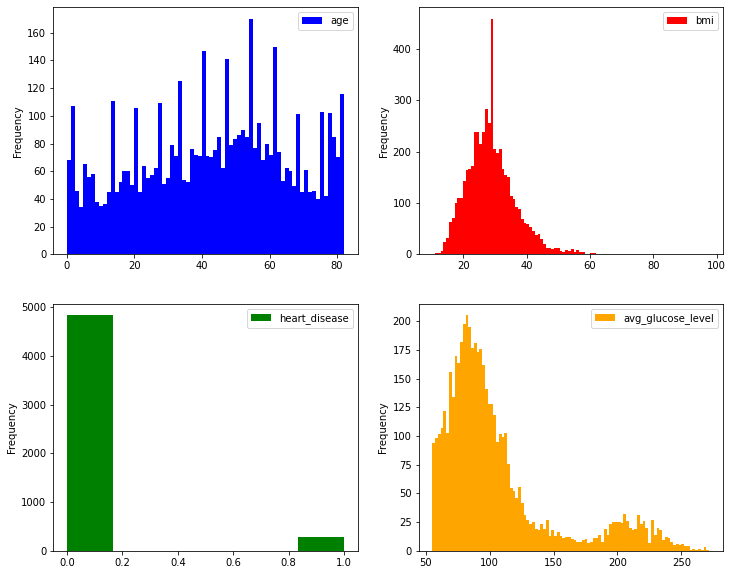

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
data.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

##exploratory data analysis

Text(0.5, 1.0, 'Correlation Heatmap')

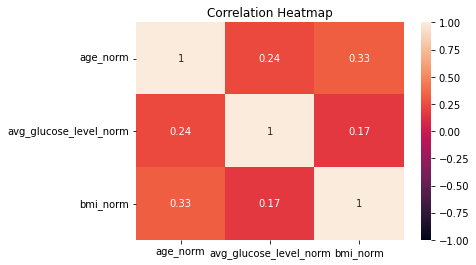

In [18]:
# Create the correlation heatmap
heatmap = sns.heatmap(data[['age_norm', 'avg_glucose_level_norm', 'bmi_norm']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

In [19]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = data.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

In [20]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = data.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = data.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

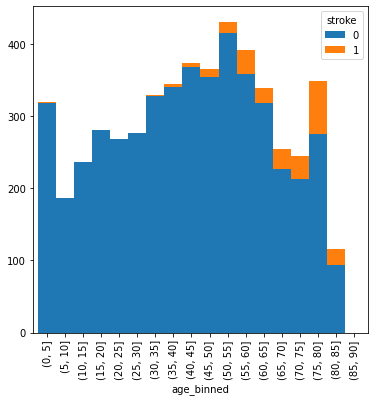

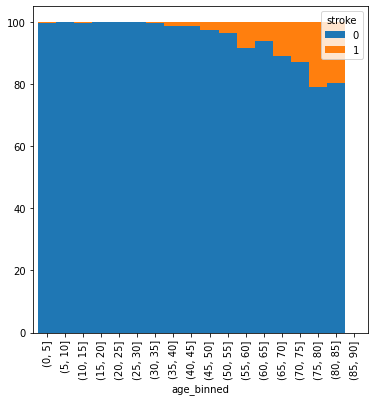

In [21]:
get_stacked_bar_chart(data['age_binned'])
get_100_percent_stacked_bar_chart(data['age_binned'], width = 1)

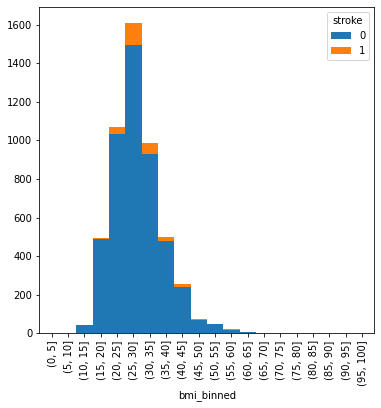

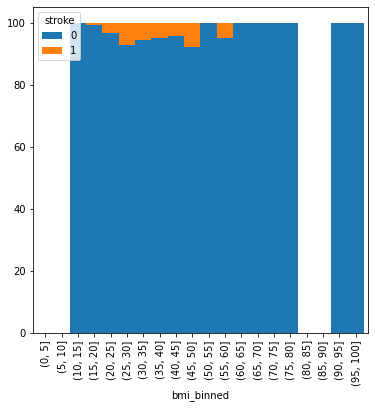

In [22]:
get_stacked_bar_chart(data['bmi_binned'])
get_100_percent_stacked_bar_chart(data['bmi_binned'], width = 1)

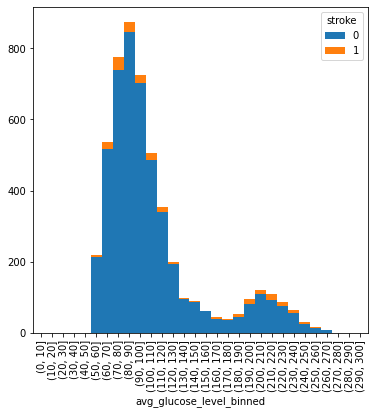

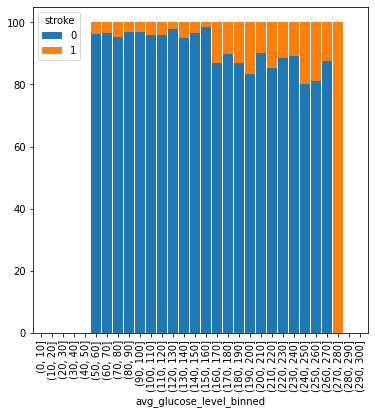

In [23]:
get_stacked_bar_chart(data['avg_glucose_level_binned'])
get_100_percent_stacked_bar_chart(data['avg_glucose_level_binned'], width = 0.9)

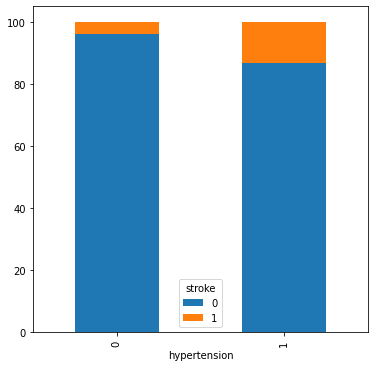

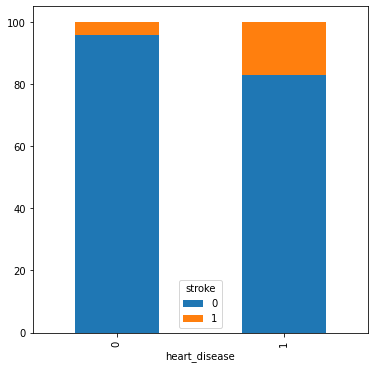

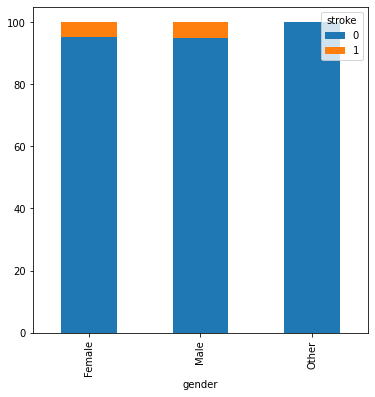

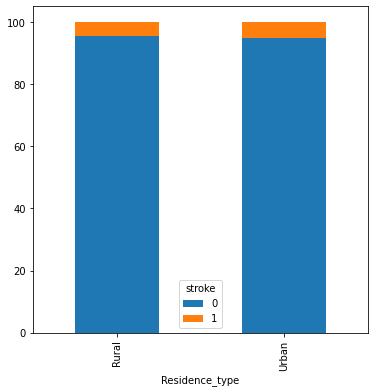

In [24]:
get_100_percent_stacked_bar_chart(data['hypertension'])
get_100_percent_stacked_bar_chart(data['heart_disease'])
get_100_percent_stacked_bar_chart(data['gender'])
get_100_percent_stacked_bar_chart(data['Residence_type'])

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2925  45.503932
Self-employed   819  60.201465
children        687   6.841339

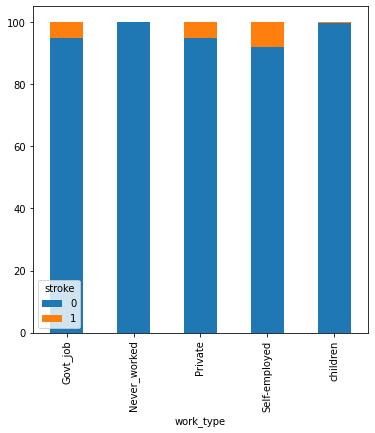

In [25]:
get_100_percent_stacked_bar_chart(data['work_type'])
data.groupby(['work_type'])[['age']].agg(['count', 'mean'])

age           
             count       mean
ever_married                 
No            1757  22.014229
Yes           3353  54.342082

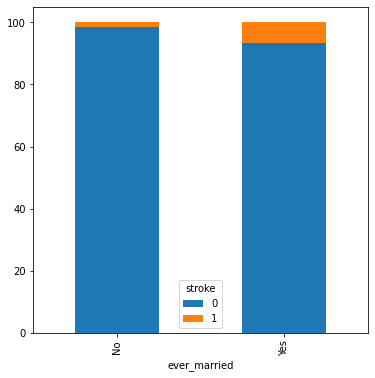

In [26]:
get_100_percent_stacked_bar_chart(data['ever_married'])
data.groupby(['ever_married'])[['age']].agg(['count', 'mean'])

##data cleaning

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [28]:
'''data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status'],drop_first=True)'''

"data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status'],drop_first=True)"

In [29]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_norm', 'avg_glucose_level_norm',
       'bmi_norm', 'age_binned', 'avg_glucose_level_binned', 'bmi_binned'],
      dtype='object')

In [30]:
data.drop(columns=['age', 'heart_disease', 'avg_glucose_level', 'bmi',
       'age_binned', 'avg_glucose_level_binned', 'bmi_binned'], inplace=True)

In [31]:
'''data.drop(columns=['age_binned', 'avg_glucose_level_binned', 'bmi_binned'], inplace=True)'''

"data.drop(columns=['age_binned', 'avg_glucose_level_binned', 'bmi_binned'], inplace=True)"

In [32]:
data.head()

,gender,hypertension,ever_married,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,1,0,1,2,1,1,1,0.816895,0.801265,0.301260
1,0,0,1,3,0,2,1,0.743652,0.679023,0.212981
2,1,0,1,2,0,2,1,0.975586,0.234512,0.254296
3,0,0,1,2,1,3,1,0.597168,0.536008,0.276060
4,0,1,1,3,0,2,1,0.963379,0.549349,0.156930


In [33]:
data.shape

(5110, 10)

##data division


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
6,age_norm,326.916568
7,avg_glucose_level_norm,90.503870
1,hypertension,84.953542
2,ever_married,60.667230
8,bmi_norm,7.759776
3,work_type,5.340019
5,smoking_status,4.043033
4,Residence_type,1.220842
0,gender,0.407266


In [36]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1              hypertension
2              ever_married
6                  age_norm
7    avg_glucose_level_norm
Name: Attribute, dtype: object


In [37]:
x_train,x_test,y_train,y_test=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)
#Splitting data
x_train.shape,x_test.shape,y_train.shape,y_test.shape
# Shape of data

((3832, 4), (1278, 4), (3832,), (1278,))

As we know, our dataset is imbalanced. So to balance our data we have used SMOTE method. It will populate our data with records similar to our minor class. Usually, we perform this on the whole dataset but as we have very fewer records of minor class I am applying it on both train and test data. Earlier I tried doing it by just resampling data of the training dataset but it didn’t perform that well so I tried this approach and got a good result.

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)
x_test,y_test=smote.fit_resample(x_test,y_test)

In [39]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7296, 4) (7296,) (2426, 4) (2426,)


#Models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

##1.XGB

In [41]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=1000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(x_train,y_train)
predict=xgc.predict(x_test)
print('Accuracy --> ',accuracy_score(predict,y_test))
print('F1 Score --> ',f1_score(predict,y_test))
print('Classification Report  --> \n',classification_report(predict,y_test))

Accuracy -->  0.7947238252267106
F1 Score -->  0.803472770323599
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.75      0.82      0.79      1105
           1       0.84      0.77      0.80      1321

    accuracy                           0.79      2426
   macro avg       0.79      0.80      0.79      2426
weighted avg       0.80      0.79      0.80      2426



In [42]:
from sklearn.model_selection import RandomizedSearchCV
params1={ "learning_rate": [0.001,0.01,0.02,0.03,0.04,0.05,0.10,0.15, 0.20, 0.25, 0.30, 0.40,0.6,0.7,0.8,0.9,0.99 ],
        "max_depth":[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
        "min_child_weight":[0.06,1,2,3,4,5,6,7,8,9], 
        "gamma":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        "colsample_bytree":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         "n_estimators": [80, 100, 120]}
classifier1=XGBClassifier()
random_search1=RandomizedSearchCV(classifier1,param_distributions=params1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search1.fit(x_train,y_train)
random_search1.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(colsample_bytree=0.9, gamma=0.6, learning_rate=0.25, max_depth=13,
              min_child_weight=0.06, n_estimators=80)

In [66]:
model1_new = XGBClassifier(colsample_bytree=0.9, gamma=0.6, learning_rate=0.25, max_depth=13,
              min_child_weight=0.06, n_estimators=80)
model1_new.fit(x_train,y_train)
y_pre3 = model1_new.predict(x_test)

as1 = accuracy_score(y_pre3,y_test)
f1 = f1_score(y_pre3,y_test)
cf = classification_report(y_pre3,y_test)

print("accuracy score:", accuracy_score(y_pre3,y_test))
print("f1_score:" ,f1_score(y_pre3,y_test))
print('Classification Report  --> \n',classification_report(y_pre3,y_test))

accuracy score: 0.9047815333882935
f1_score: 0.898193036579991
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1370
           1       0.84      0.96      0.90      1056

    accuracy                           0.90      2426
   macro avg       0.90      0.91      0.90      2426
weighted avg       0.91      0.90      0.91      2426



##2.decision tree

In [44]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
y_pred = DTC.predict(x_test)

print('Accuracy --> ',accuracy_score(y_pred,y_test))
print('F1 Score --> ',f1_score(y_pred,y_test))
print('Classification Report  --> \n',classification_report(y_pred,y_test))

Accuracy -->  0.7605111294311624
F1 Score -->  0.71864406779661
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1574
           1       0.61      0.87      0.72       852

    accuracy                           0.76      2426
   macro avg       0.76      0.79      0.76      2426
weighted avg       0.80      0.76      0.77      2426



###DTC with gridsearchcv

In [45]:
model_comparison = {}

In [46]:
'''parameters = {'max_depth': [11,12,13,14,15,16,17,18,17,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]}'''
parameters = {'criterion':["gini","entropy"], 'max_depth': [None,1,2,3,4,5,6], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf':[1,2,3,4,5,6], 'max_leaf_nodes': [None,1,2,3,4,5]}
Tree_model = DecisionTreeClassifier()
clf = GridSearchCV(Tree_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0      0.752     0.925     0.830      1213
           1      0.903     0.695     0.785      1213

    accuracy                          0.810      2426
   macro avg      0.827     0.810     0.807      2426
weighted avg      0.827     0.810     0.807      2426



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


2100 fits failed out of a total of 12600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1


/usr/local

In [67]:
DTC_new = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 2)
DTC_new.fit(x_train, y_train)
y_pred = DTC_new.predict(x_test)

as2 = accuracy_score(y_pred,y_test)
f2 = f1_score(y_pred,y_test)
cf2 = classification_report(y_pred,y_test)

print('Accuracy --> ',accuracy_score(y_pred,y_test))
print('F1 Score --> ',f1_score(y_pred,y_test))
print('Classification Report  --> \n',classification_report(y_pred,y_test))

Accuracy -->  0.8054410552349547
F1 Score -->  0.7790262172284644
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      1503
           1       0.69      0.90      0.78       923

    accuracy                           0.81      2426
   macro avg       0.81      0.82      0.80      2426
weighted avg       0.83      0.81      0.81      2426



##3. Naive Bayes

In [48]:
clf = BernoulliNB()
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)
print('Accuracy --> ',accuracy_score(y_pred2,y_test))
print('F1 Score --> ',f1_score(y_pred2,y_test))
print('Classification Report  --> \n',classification_report(y_pred2,y_test))

Accuracy -->  0.6075845012366035
F1 Score -->  0.6866359447004609
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.36      0.72      0.48       601
           1       0.86      0.57      0.69      1825

    accuracy                           0.61      2426
   macro avg       0.61      0.64      0.58      2426
weighted avg       0.73      0.61      0.63      2426



In [68]:
params2={ 'fit_prior':[True,False],'alpha':[0.01,0.1,0.9,1,1.5]}
classifier2=BernoulliNB()
random_search2=RandomizedSearchCV(classifier2,param_distributions=params2,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search2.fit(x_train,y_train)
random_search2.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


BernoulliNB(alpha=0.1)

In [70]:
model4_new = BernoulliNB(alpha=0.1,fit_prior=False)
model4_new.fit(x_train,y_train)
y_pre4 = model4_new.predict(x_test)


as3 = accuracy_score(y_pre4,y_test)
f3 = f1_score(y_pre4,y_test)
cf3 = classification_report(y_pre4,y_test)

print("accuracy score:", accuracy_score(y_pre4,y_test))
print("f1_score:" ,f1_score(y_pre4,y_test))
print('Classification Report  --> \n',classification_report(y_pre4,y_test))

accuracy score: 0.6075845012366035
f1_score: 0.6866359447004609
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.36      0.72      0.48       601
           1       0.86      0.57      0.69      1825

    accuracy                           0.61      2426
   macro avg       0.61      0.64      0.58      2426
weighted avg       0.73      0.61      0.63      2426



##4. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier as rfc
model1 = rfc()
model1.fit(x_train,y_train)
y_pred3 = model1.predict(x_test)
print('Accuracy --> ',accuracy_score(y_pred3,y_test))
print('F1 Score --> ',f1_score(y_pred3,y_test))
print('Classification Report  --> \n',classification_report(y_pred3,y_test))

Accuracy -->  0.6978565539983512
F1 Score -->  0.6131926121372032
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.92      0.64      0.75      1744
           1       0.48      0.85      0.61       682

    accuracy                           0.70      2426
   macro avg       0.70      0.74      0.68      2426
weighted avg       0.79      0.70      0.71      2426



In [52]:
'''parameters = {'max_depth': [11,12,13,14,15,16,17,18,17,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]}'''
'''params2 = {'n_estimators': [80,100,120,140,160,180,200,220], 'max_depth':[None,2,3,6,8,10,12,14,16,18,20,22,24],'min_samples_split':[2,4,6,8,10], 'min_samples_leaf':[1,2,3,4,5,6],'max_samples':[None,0,1,2] }'''
params2 = { 'max_depth':[None,2,3,6,8,10,12,14,16,18,20,22,24],'min_samples_split':[2,4,6,8,10] }
model1 = rfc()
clf = GridSearchCV(model1, params2)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 22, 'min_samples_split': 4}


              precision    recall  f1-score   support

           0      0.640     0.910     0.751      1213
           1      0.844     0.487     0.618      1213

    accuracy                          0.699      2426
   macro avg      0.742     0.699     0.685      2426
weighted avg      0.742     0.699     0.685      2426



In [71]:
model5_new =rfc(max_depth= 22, min_samples_split= 4)
model5_new.fit(x_train,y_train)
y_pre5 = model4_new.predict(x_test)


as5 = accuracy_score(y_pre5,y_test)
f5 = f1_score(y_pre5,y_test)
cf5 = classification_report(y_pre5,y_test)

print("accuracy score:", accuracy_score(y_pre5,y_test))
print("f1_score:" ,f1_score(y_pre5,y_test))
print('Classification Report  --> \n',classification_report(y_pre5,y_test))

accuracy score: 0.6075845012366035
f1_score: 0.6866359447004609
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.36      0.72      0.48       601
           1       0.86      0.57      0.69      1825

    accuracy                           0.61      2426
   macro avg       0.61      0.64      0.58      2426
weighted avg       0.73      0.61      0.63      2426



##5.Light GBM

In [54]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
print('Accuracy --> ',accuracy_score(y_pred4,y_test))
print('F1 Score --> ',f1_score(y_pred4,y_test))
print('Classification Report  --> \n',classification_report(y_pred4,y_test))

Accuracy -->  0.902308326463314
F1 Score -->  0.8963707914298208
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1352
           1       0.85      0.95      0.90      1074

    accuracy                           0.90      2426
   macro avg       0.90      0.91      0.90      2426
weighted avg       0.91      0.90      0.90      2426



In [55]:
params3={ "learning_rate": [None,0.001,0.01,0.02,0.03,0.04,0.05,0.10,0.15, 0.20, 0.25, 0.30, 0.40,0.6,0.7,0.8,0.9,0.99 ],
        "max_depth":[None,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
        "min_child_weight":[None,0.06,1,2,3,4,5,6,7,8,9], 
        "gamma":[None,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        "colsample_bytree":[None,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         "n_estimators": [None,80, 100, 120]}
classifier3=lgb.LGBMClassifier()
random_search3=RandomizedSearchCV(classifier3,param_distributions=params3,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search3.fit(x_train,y_train)
random_search3.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


LGBMClassifier(colsample_bytree=None, gamma=0.7, learning_rate=0.3,
               max_depth=11, min_child_weight=6, n_estimators=120)

In [72]:
model5_new = lgb.LGBMClassifier(colsample_bytree=None, gamma=0.7, learning_rate=0.3,
               max_depth=11, min_child_weight=6, n_estimators=120)
model5_new.fit(x_train,y_train)
y_pre6 = model5_new.predict(x_test)

as6 = accuracy_score(y_pre6,y_test)
f6 = f1_score(y_pre6,y_test)
cf6 = classification_report(y_pre6,y_test)

print("accuracy score:", accuracy_score(y_pre6,y_test))
print("f1_score:" ,f1_score(y_pre6,y_test))
print('Classification Report  --> \n',classification_report(y_pre6,y_test))

accuracy score: 0.8767518549051937
f1_score: 0.8668151447661471
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1394
           1       0.80      0.94      0.87      1032

    accuracy                           0.88      2426
   macro avg       0.88      0.89      0.88      2426
weighted avg       0.89      0.88      0.88      2426



#Evaluation of different models

###comparing different models

In [57]:
Models = ['XGBoost Classifier','Decision Tree Classifier','Naive Bayes Classifier','Random Forest Classifier','LGBM Classifier']
ascore = [as1, as2, as3, as5,as6]
fscore = [f1, f2, f3, f5, f6]

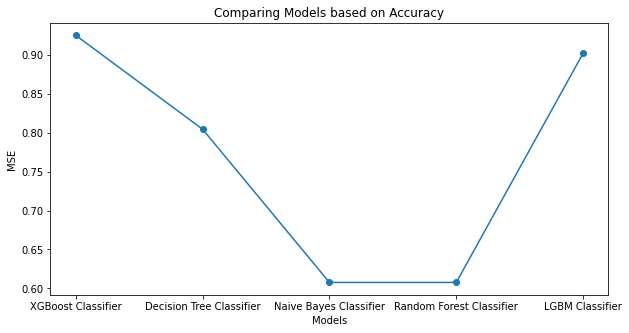

In [73]:
plt.figure(figsize = (10, 5))
plt.title('Comparing Models based on Accuracy')
ax = plt.scatter(x = Models, y = ascore)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.plot( Models,  ascore)

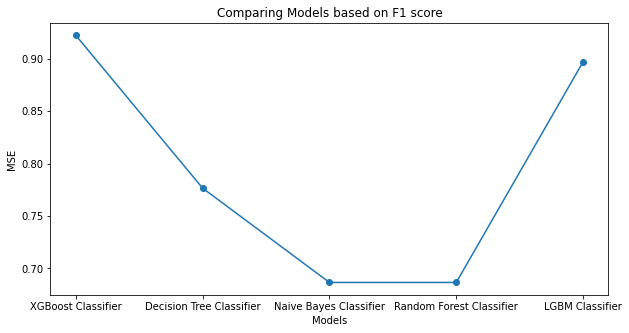

In [74]:
plt.figure(figsize = (10, 5))
plt.title('Comparing Models based on F1 score')
ax = plt.scatter(x = Models, y = fscore)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.plot( Models,  fscore)

In [60]:
from sklearn.metrics import roc_curve
from sklearn import metrics

###model evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



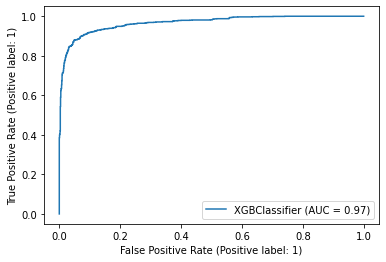

In [75]:
#xgb
metrics.plot_roc_curve(model1_new, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



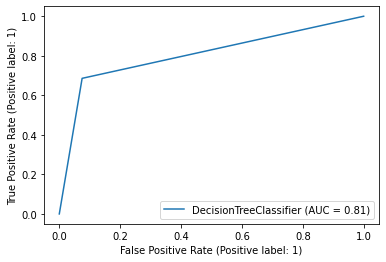

In [76]:
#DTC
metrics.plot_roc_curve(DTC_new, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



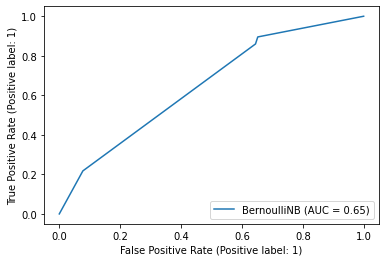

In [77]:
#naives bayes
metrics.plot_roc_curve(model4_new, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



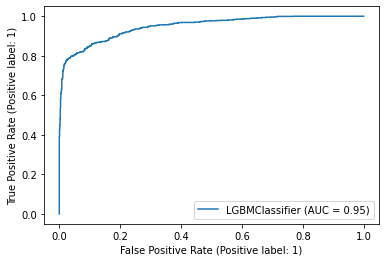

In [78]:
#random forest
metrics.plot_roc_curve(model5_new, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



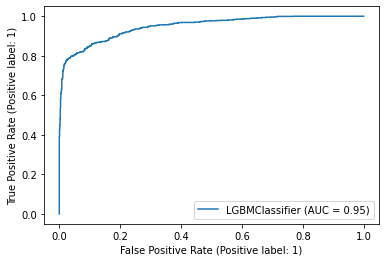

In [79]:
#lgbm
metrics.plot_roc_curve(model5_new, x_test, y_test)